<a href="https://colab.research.google.com/github/adhang/data-science-digitalskola/blob/update/99.%20Final%20Project/Telco%20Customer%20Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___
The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers.
<br><br>

**Background**
- Companies need to invest (expense costs) to get new customers
- When a customer leaves the service (churn), it indicates a loss of investment
- Cost, time, and effort need to be channelled to replace customers who have left the service
- Acquiring new customers is often more difficult and more expensive than retaining existing customers
<br><br>

**Purpose**
- Predict whether customers will continue to use the service or will leave the service
- Understand what keeps customers using the service and what makes them leave the service
<br><br>

**Contents**
1. Dataset Information
2. Importing Libraries
3. Reading Dataset
4. Dataset Overview
5. Exploratory Data Analysis

# 1. Dataset Information
This dataset comes from Kaggle, you can find it here: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn).
<br><br>
This dataset is used to predict behavior to retain customers. Each row represents a customer, and each column contains customer's attribute.
<br><br>
**Attribute Information**
- Identifier
  - `customerID` - ID number of the customer

- Target Variable
  - `Churn` - Churn status, whether the customer churned or not

- Demographic information
  - `gender` - Whether the customer is a male or a female
  - `SeniorCitizen` - Whether the customer is a senior citizen or not
  - `Partner` - Whether the customer has a partner or not
  - `Dependents` - Whether the customer has dependents or not

- Customer account information
  - `tenure` - Number of months the customer has used the service
  - `Contract` - The contract term of the customer
  - `PaperlessBilling` - Whether the customer has paperless billing or not
  - `PaymentMethod` - The customer’s payment method
  - `MonthlyCharges` - The amount charged to the customer monthly
  - `TotalCharges` - The total amount charged to the customer
  
- Services that each customer has signed up for
  - `PhoneService` - Whether the customer has a phone service or not
  - `MultipleLines` - Whether the customer has multiple lines or not
  - `InternetService` - Customer’s internet service provider
  - `OnlineSecurity` - Whether the customer has online security or not
  - `OnlineBackup` - Whether the customer has online backup or not
  - `DeviceProtection` - Whether the customer has device protection or not
  - `TechSupport` - Whether the customer has tech support or not
  - `StreamingTV` - Whether the customer has streaming TV or not
  - `StreamingMovies` - Whether the customer has streaming movies or not
<br><br>

**Note:** Since this dataset is using `CamelCase` format for the column names, for this project, I will convert it to `snake_case` format.

# 1. Dataset Information
This dataset comes from Kaggle, you can find it here: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn).
<br><br>
This dataset is used to predict behavior to retain customers. Each row represents a customer, and each column contains customer's attribute.
<br><br>
**Attribute Information**
- Identifier
  - `customerID` <br>
  Unique identifier for each customer

- Target Variable
  - `Churn` <br>
  Churn status, whether the customer churned or not (Yes or No)

- Demographic information
  - `gender` <br>
  Whether the customer is a male or a female
  - `SeniorCitizen` <br>
  Whether the customer is a senior citizen or not (1, 0)
  - `Partner` <br>
  Whether the customer has a partner or not (Yes, No)
  - `Dependents`(Tanggungan) <br>
  Whether the customer has dependents or not (Yes, No)

- Customer account information
  - `tenure` <br>
  Number of months the customer has stayed with the company
  - `Contract` <br>
  The contract term of the customer (Month-to-month, One year, Two year)
  - `PaperlessBilling` <br>
  Whether the customer has paperless billing or not (Yes, No)
  - `PaymentMethod` <br>
  The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
  - `MonthlyCharges` <br>
  The amount charged to the customer monthly
  - `TotalCharges` <br>
  The total amount charged to the customer (monthly charge * tenure)
  
- Services that each customer has signed up for
  - `PhoneService` <br>
  Whether the customer has a phone service or not (Yes, No)
  - `MultipleLines` <br>
  Whether the customer has multiple lines or not (Yes, No, No phone service). (Mungkin dalam 1 lokasi ada beberapa jalur telepon)
  - `InternetService` <br>
  Customer’s internet service provider (DSL, Fiber optic, No)
  - `OnlineSecurity` <br>
  Whether the customer has online security or not (Yes, No, No internet service) (Misal penambahan firewall untuk pengamanan jaringan)
  - `OnlineBackup` <br>
  Whether the customer has online backup or not (Yes, No, No internet service)
  - `DeviceProtection` <br>
  Whether the customer has device protection or not (Yes, No, No internet service) (Bisa juga tentang garansi)
  - `TechSupport` <br>
  Whether the customer has tech support or not (Yes, No, No internet service)
  - `StreamingTV` <br>
  Whether the customer has streaming TV or not (Yes, No, No internet service)
  - `StreamingMovies` <br>
  Whether the customer has streaming movies or not (Yes, No, No internet service) (semacam netflix)

# Importing Libraries

In [ ]:
!pip install empiricaldist

In [ ]:
import pandas as pd
import numpy as np

from empiricaldist import Pmf, Cdf

import re

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rc('patch', edgecolor='black')
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1.5})

# I change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)

# Reading Dataset

In [ ]:
path = '/content/drive/MyDrive/Digital Skola/Final Project/dataset/Telco-Customer-Churn.csv'

data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dataset Overview

## Renaming Column Names
Since this dataset is using `CamelCase` format for the column names, I will convert it to `snake_case` format.
<br><br>
The `camel_to_snake` function comes from [here](https://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-snake-case).

In [ ]:
def camel_to_snake(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

column_list = []

for col in data.columns:
  column_list.append(camel_to_snake(col))

column_list

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'churn']

In [ ]:
data.columns = column_list
data.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Duplicate Values

In [ ]:
data.duplicated().sum()

0

This dataset doesn't have any duplicate values. It's a good sign.

## Dropping Column
Since the `customer_id` is not essential, I will drop it.

In [ ]:
data.drop('customer_id', axis=1, inplace=True)
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Types

### General Data Type

In [ ]:
# numerical
column_list_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_list_categorical = list(data.columns)
column_list_categorical.remove('tenure')
column_list_categorical.remove('monthly_charges')
column_list_categorical.remove('total_charges')

In [ ]:
data_type_general = dict()

for col in column_list_numerical:
  data_type_general[col] = 'numerical'

for col in column_list_categorical:
  data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
general data types,numerical,numerical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical


### Python Data Type

In [ ]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


From this output, we can see that the `total_charges` attribute has `object` data type. So, I will change it to numeric.
<br><br>
Before converting to numeric data type, since I had already explored this dataset, let's check the `total_charges` attribute where the `tenure` attribute is `0`.

In [ ]:
data[data['tenure'] == 0].head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


If you look at the original dataset, if the `tenure` attribute has `0` value, it will have blank value on the `total_charges` attribute. It's reasonable, since they haven't used any services, so they don't have any charges.
<br><br>
But, it's not a null value.

In [ ]:
data['total_charges'].isna().sum()

0

In [ ]:
data.loc[488, 'total_charges']

' '

It's not null, but a blank space `' '`. So, I will use `errors = coerce` parameter to set the invalid parsing (blank space) as `NaN`.

In [ ]:
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data['total_charges'].isna().sum()

11

After converting to numeric data type, our data contains 11 `NaN` values, since some of the value is not a numeric. Then, I will replace the null value with `0`.

In [ ]:
data['total_charges'].fillna(0, inplace=True)
data['total_charges'].isna().sum()

0

In [ ]:
data['total_charges'] = data['total_charges'].astype(float)
data.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

It works. So, I will re-create the dataframe to store the data type of each column.

In [ ]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


## Total Data

In [ ]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043


## Null Values

### Total Null Values

In [ ]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Null Values Percentage

In [ ]:
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})
data_null_percentage

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Variation
I will find out the data variation:
- The range of data, for numerical data
- The category variations, for categorical data

### Numerical Data
This dataset only contains 3 numerical data: `tenure`, `monthly_charges` and `total_charges`.

In [ ]:
data[column_list_numerical].min()

tenure              0.00
monthly_charges    18.25
total_charges       0.00
dtype: float64

In [ ]:
data[column_list_numerical].max()

tenure               72.00
monthly_charges     118.75
total_charges      8684.80
dtype: float64

In [ ]:
variation_numerical = dict()

for col in column_list_numerical:
  tmp = f'{data[col].min()} - {data[col].max()}'
  variation_numerical[col] = tmp

variation_numerical

{'monthly_charges': '18.25 - 118.75',
 'tenure': '0 - 72',
 'total_charges': '0.0 - 8684.8'}

In [ ]:
tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

,tenure,monthly_charges,total_charges
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8


### Categorical Data

In [ ]:
variation_categorical = dict()

for col in column_list_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

variation_categorical

{'churn': 'No, Yes',
 'contract': 'Month-to-month, One year, Two year',
 'dependents': 'No, Yes',
 'device_protection': 'No, No internet service, Yes',
 'gender': 'Female, Male',
 'internet_service': 'DSL, Fiber optic, No',
 'multiple_lines': 'No, No phone service, Yes',
 'online_backup': 'No, No internet service, Yes',
 'online_security': 'No, No internet service, Yes',
 'paperless_billing': 'No, Yes',
 'partner': 'No, Yes',
 'payment_method': 'Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check',
 'phone_service': 'No, Yes',
 'senior_citizen': '0, 1',
 'streaming_movies': 'No, No internet service, Yes',
 'streaming_tv': 'No, No internet service, Yes',
 'tech_support': 'No, No internet service, Yes'}

In [ ]:
tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


### Overall Data Variation

In [ ]:
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
# data_variation = data_variation.reindex(data.columns, axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


In [ ]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,range,variation
gender,-,"Female, Male"
senior_citizen,-,"0, 1"
partner,-,"No, Yes"
dependents,-,"No, Yes"
tenure,0 - 72,-
phone_service,-,"No, Yes"
multiple_lines,-,"No, No phone service, Yes"
internet_service,-,"DSL, Fiber optic, No"
online_security,-,"No, No internet service, Yes"
online_backup,-,"No, No internet service, Yes"


## Data Info

In [ ]:
data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

data_info = data_info.reindex(data.columns, axis=1)
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","0, 1","No, Yes","No, Yes",0 - 72,"No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


In [ ]:
pd.concat([data_type_general, data_variation], axis=0).reindex(data.columns, axis=1)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
data variation,"Female, Male","0, 1","No, Yes","No, Yes",0 - 72,"No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


It's similar to the `info()` method, but in a different representation.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   object 
 6   multiple_lines     7043 non-null   object 
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   object 
 9   online_backup      7043 non-null   object 
 10  device_protection  7043 non-null   object 
 11  tech_support       7043 non-null   object 
 12  streaming_tv       7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   object 
 16  payment_method     7043 

# Exploratory Data Analysis

## Probability Mass Function

In [ ]:
pmf_data = Pmf.from_seq(data['churn'], normalize=True)
pmf_data = pd.DataFrame({'churn':pmf_data.index, 'pmf':pmf_data.values})
pmf_data.set_index('churn').round(3).style.background_gradient(vmin=0, subset='pmf')

,pmf
churn,
No,0.735000
Yes,0.265000


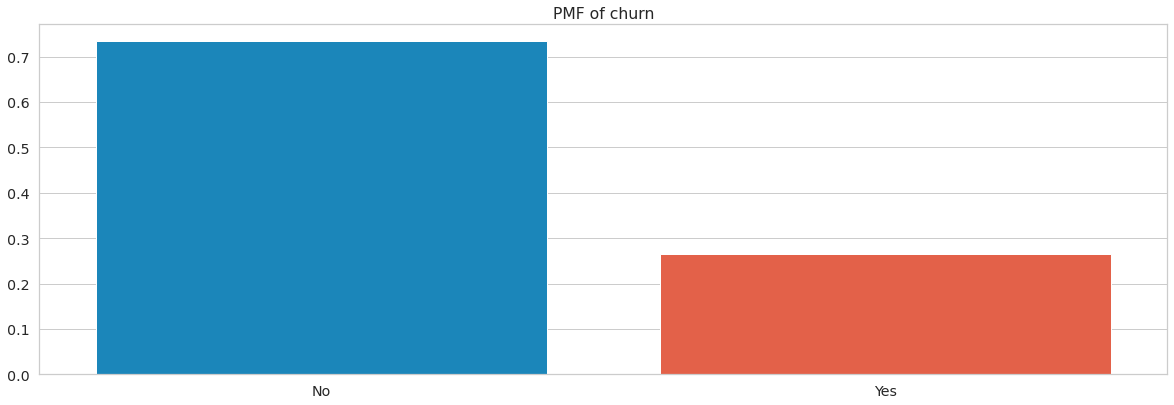

In [ ]:
plt.figure(figsize=(18,6))

ax = sns.barplot(data=pmf_data, x='churn', y='pmf')

ax.set_title(f'PMF of {"churn"}')
ax.set_xlabel('')
ax.set_ylabel('')
# plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

## Filtering Data
I will filter the original data to create 2 new dataframes:
- `customer_churn` - contains data where the customer still exists
- `customer_retain` - contains data where the customer has been attrited

In [ ]:
customer_churn = data[data['churn'] == 'Yes']
customer_churn.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [ ]:
customer_retain = data[data['churn'] == 'No']
customer_retain.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


## Categorical Data Distribution

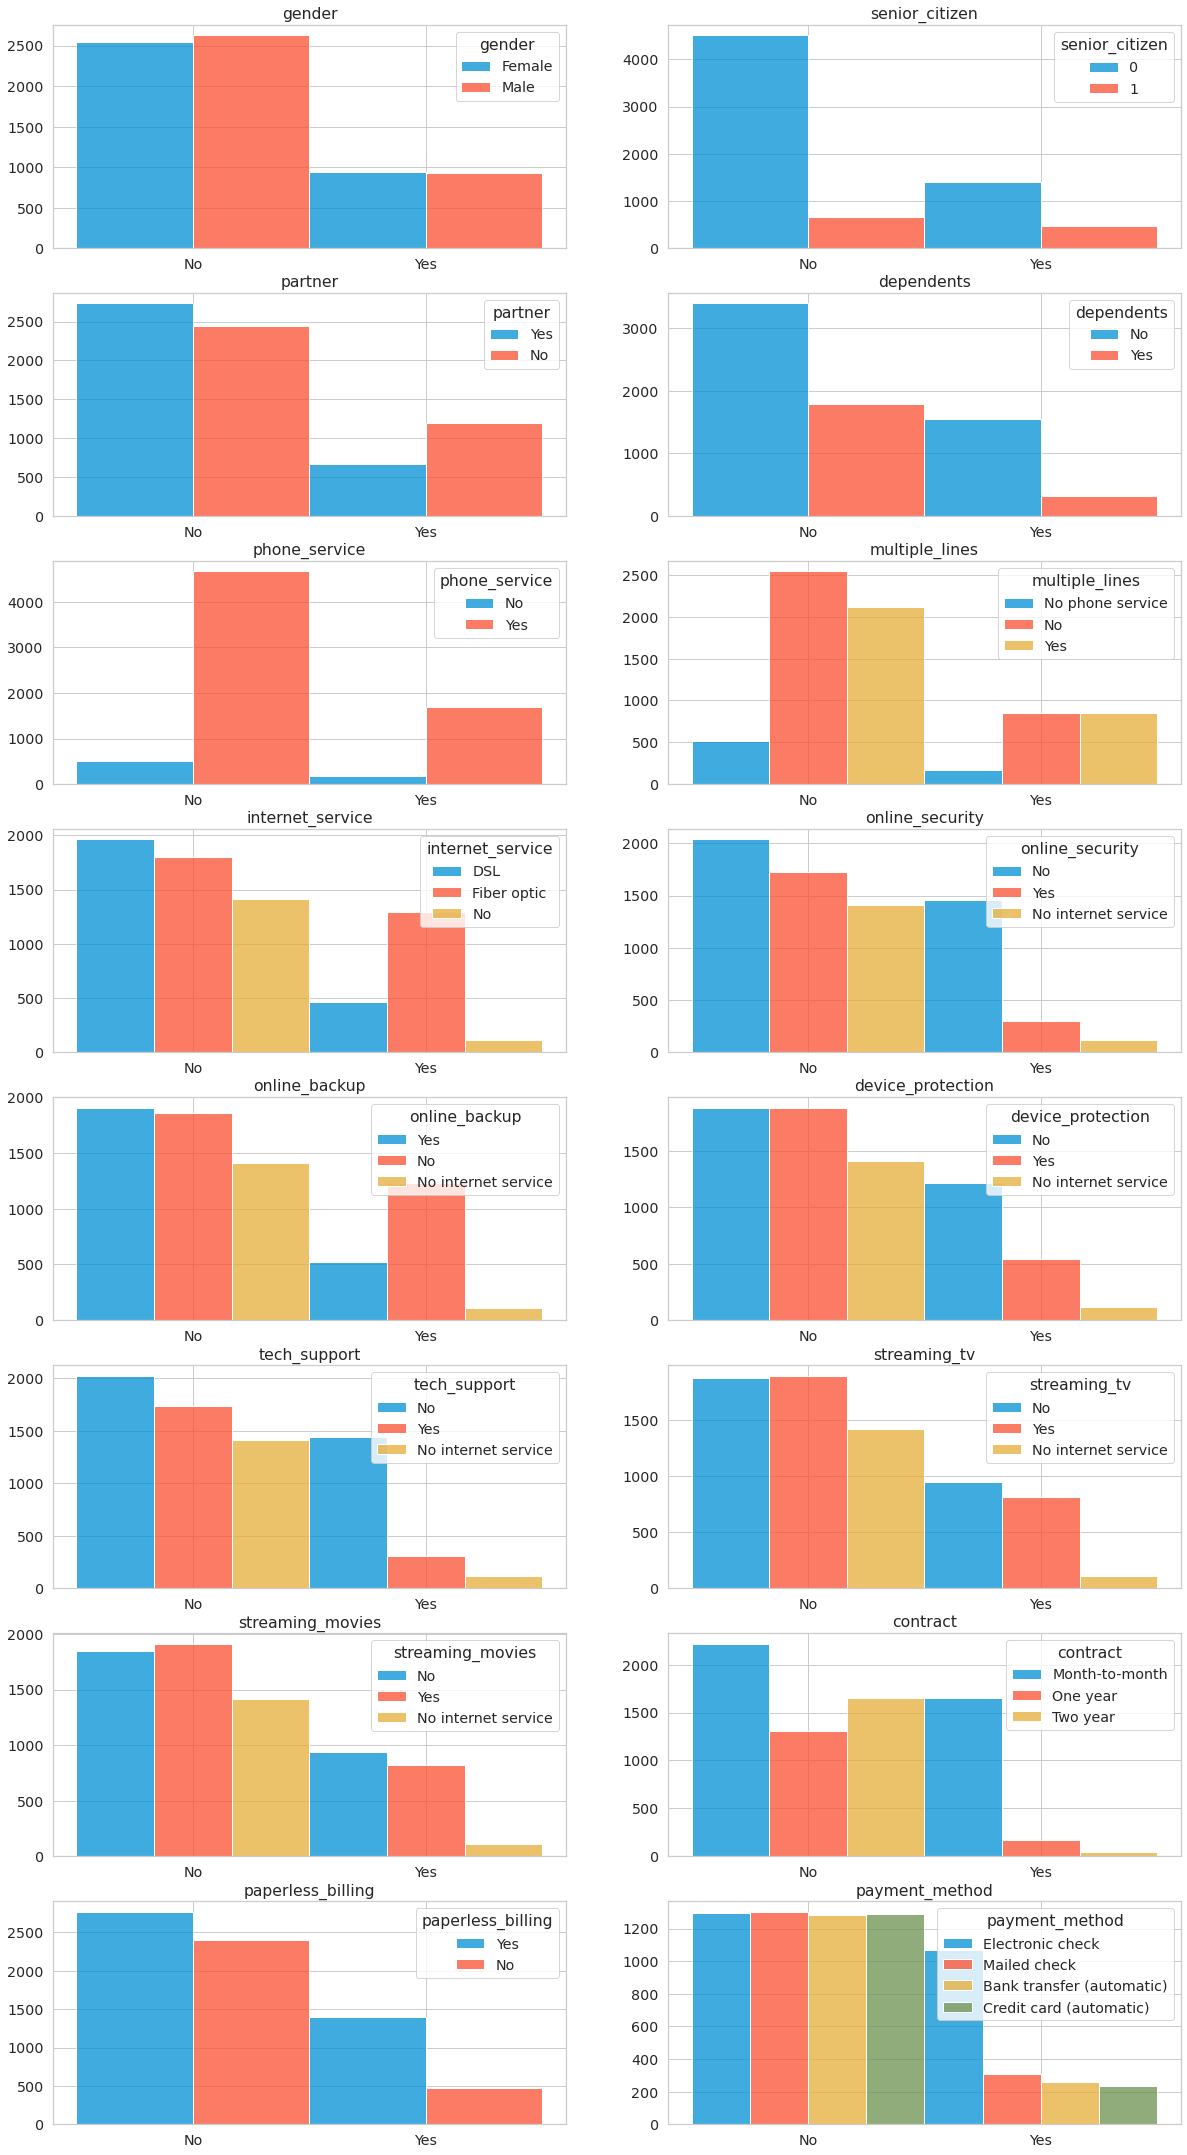

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(18,36))
axes_list = [axes for axes_row in ax for axes in axes_row]

# overall customer
for i, col in enumerate(column_list_categorical[:-1]):
  sns.histplot(data=data, x='churn', hue=col, multiple='dodge', ax=axes_list[i])
  axes_list[i].set_title(col)
  axes_list[i].set_xlabel('')
  axes_list[i].set_ylabel('')
  # plt.setp(axes_list[i].get_xticklabels(), rotation=45)

# axes_list[-1].set_visible(False)
# plt.tight_layout()
plt.show()

## Numerical Data Distribution

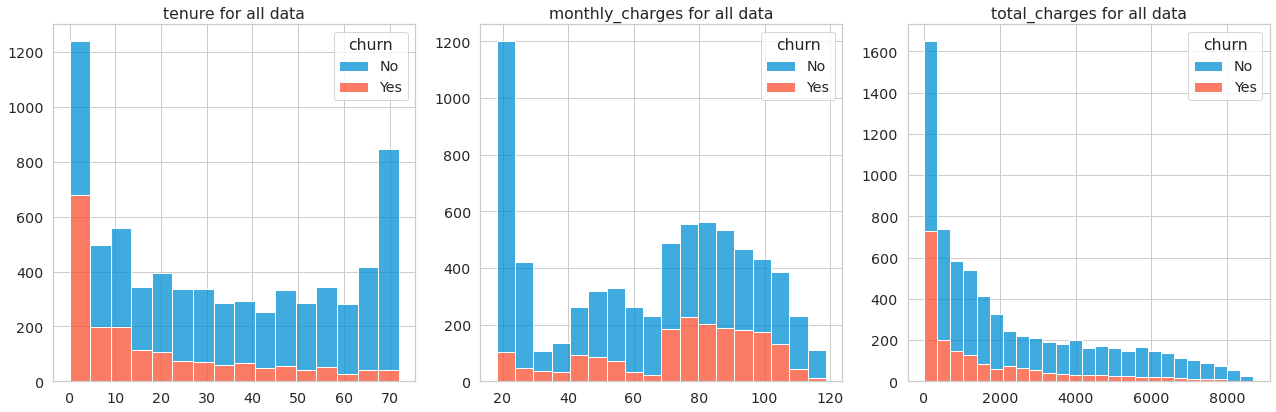

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

# overall customer
for i, col in enumerate(column_list_numerical):
  sns.histplot(data=data, x=col, hue='churn', multiple='stack', ax=ax[i])
  ax[i].set_title(f'{col} for all data')
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

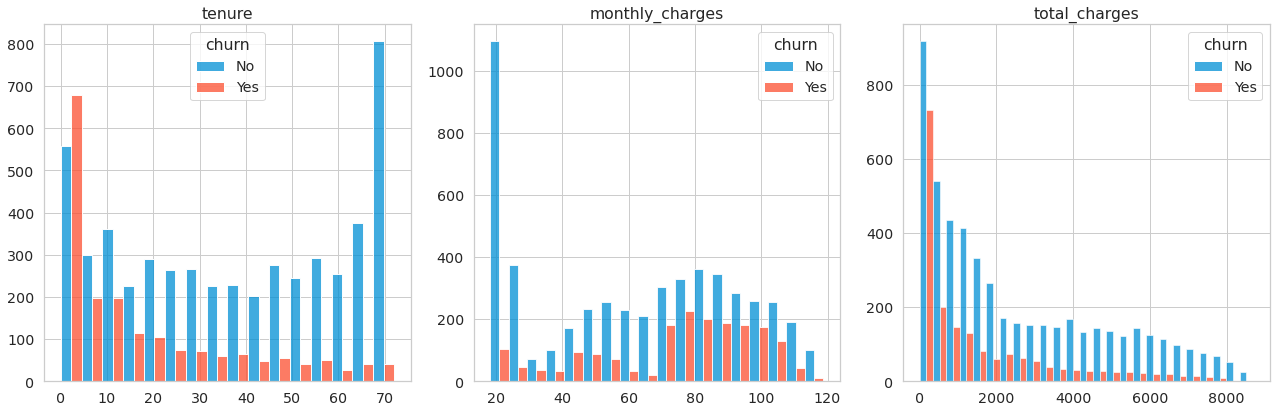

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

# overall customer
for i, col in enumerate(column_list_numerical):
  sns.histplot(data=data, x=col, hue='churn', multiple='dodge', ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

# References
- Analytics Vidhya, Churn Prediction- Commercial use of Data Science. [link](https://www.analyticsvidhya.com/blog/2021/08/churn-prediction-commercial-use-of-data-science/)
- Avaus, Predicting Customer Churn. [link](https://www.avaus.com/blog/predicting-customer-churn)
- Kaggle, Telco Customer Churn Dataset. [link](https://www.kaggle.com/blastchar/telco-customer-churn)
- IBM, Telco Customer Churn. [link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)